# Problem 1

## Part 1 
### Generate points

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
from IPython.core.interactiveshell import InteractiveShell
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

InteractiveShell.ast_node_interactivity = "all"
%matplotlib notebook

In [2]:
# Define variables

mu_1 = np.zeros(3)
mu_2 = np.array([0, 0, 1])
cov_1 = np.array([[1, 0.9, 0.9],[0.9, 1, 0.9], [0.9, 0.9, 1]])
cov_2 = np.array([[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]])
#cov_1
#cov_2

# Sample the two vectors of Gaussians
label_1 = np.random.multivariate_normal(mean=mu_1, cov=cov_1, size=20)
label_2 = np.random.multivariate_normal(mean=mu_2, cov=cov_2, size=20)

# Use these copies if you need to access the original labels
label_1_copy = label_1.copy()
label_2_copy = label_2.copy()

# Make X_train and y_train
X_train = np.concatenate((label_1_copy, label_2_copy), axis=0)
y_train = np.concatenate((np.zeros(label_1.shape[0]), np.ones(label_2.shape[0])))

<IPython.core.display.Javascript object>


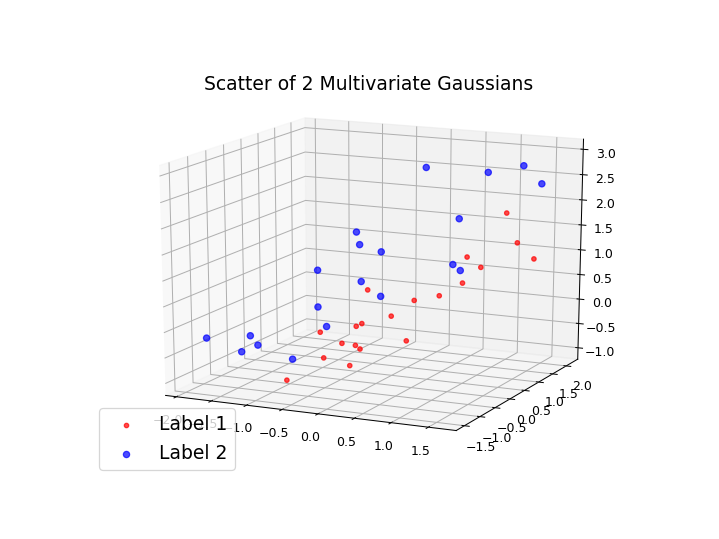

In [5]:
# MATLAB plotting > Python plotting
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(label_1[:,0], label_1[:,1], label_1[:,2], 
                alpha=0.7, s=50, color = 'red', marker='.', label="Label 1")
_ = ax.scatter(label_2[:,0], label_2[:,1], label_2[:,2], 
                alpha=0.7, s=25, color = 'blue', marker='o', label="Label 2")

_ = plt.title('Scatter of 2 Multivariate Gaussians', FontSize=15)
_ = plt.legend(loc=3, prop={'size' : 15})
for ii in range(0,360,1):
        _ = ax.view_init(elev=10., azim=ii)

## Part 2 
### Perform a projection of the data on one dimension using Fisher's Linear Discriminant

In [6]:
# Calculate mean for each class
mu_1 = np.mean(label_1_copy, axis=0, dtype=np.float64)
mu_2 = np.mean(label_2_copy, axis=0, dtype=np.float64)
#print(mu_1.shape)

# Calculate Sw
S1 = np.matmul(np.subtract(label_1_copy, mu_1).T, np.subtract(label_1_copy, mu_1))
S2 = np.matmul(np.subtract(label_2_copy, mu_2).T, np.subtract(label_2_copy, mu_2))
Sw = S1 + S2
#print(Sw.shape)

# Calculate Sb
Sb = np.outer(np.subtract(mu_1, mu_2), np.subtract(mu_1, mu_2))
#print(Sb.shape)

# Get eigenvalues and eigenvectors of Sw^-1 * Sb
#e_values, e_vectors = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
# Never mind

# Find the space to project onto 
w = np.matmul(np.linalg.inv(Sw), (mu_1 - mu_2))
w_norm = w/np.linalg.norm(w)

# Project it
proj_1 = np.matmul(label_1_copy, w_norm)
proj_2 = np.matmul(label_2_copy, w_norm)

<IPython.core.display.Javascript object>


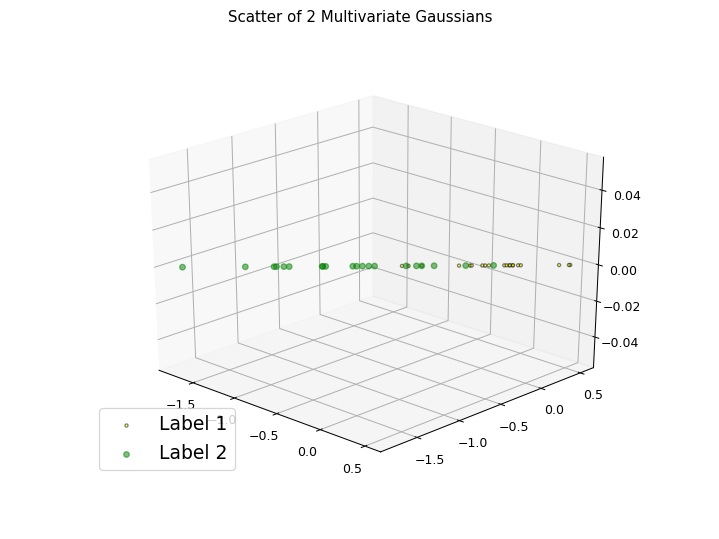

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(proj_1, proj_1, alpha=0.5, s=25, color='yellow', 
               marker='.', label="Label 1", edgecolor='black')
_ = ax.scatter(proj_2, proj_2, alpha=0.5, s=20, color='green', 
              marker='o', label="Label 2")

_ = plt.suptitle('Scatter of 2 Multivariate Gaussians', FontSize=15)
# This one is yellow and green, so not Christmas theme
#_ = plt.title('(Christmas Theme)')
_ = plt.legend(loc=3, prop={'size' : 15})
for ii in range(0,360,1):
        _ = ax.view_init(elev=10., azim=ii)

## Part 3

### Perform LDA with sklearn

In [8]:
# Make LDA, fit it, and get transformed X
lda = LinearDiscriminantAnalysis()
_ = lda.fit(X_train, y_train)
X_new = lda.transform(X_train)

<IPython.core.display.Javascript object>


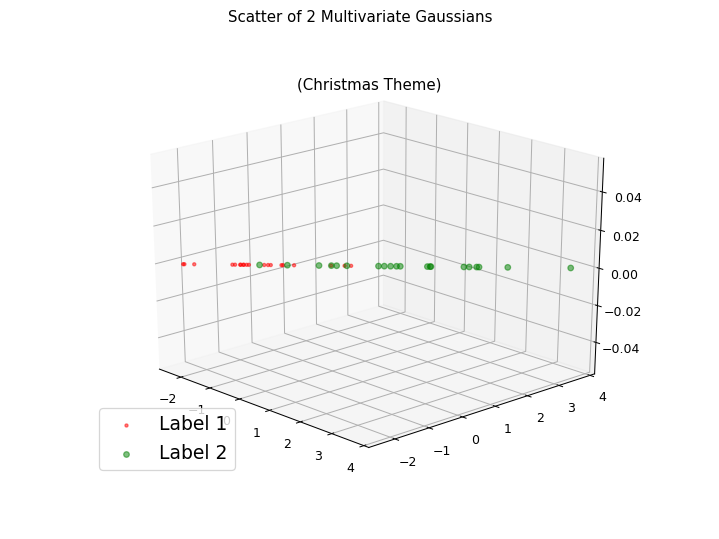

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
_ = ax.scatter(X_new[:20], X_new[:20], alpha=0.5, s=25, color='red', 
               marker='.', label="Label 1")
_ = ax.scatter(X_new[20:], X_new[20:], alpha=0.5, s=20, color='green', 
               marker='o', label="Label 2")

_ = plt.suptitle('Scatter of 2 Multivariate Gaussians', FontSize=15)
_ = plt.title('(Christmas Theme)')
_ = plt.legend(loc=3, prop={'size' : 15})
for ii in range(0,360,1):
        _ = ax.view_init(elev=10., azim=ii)

# Problem 2
## (Problem 10, Chapter 4, page 171)

This question should be answered using the <b>weekly</b> dataset, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter's lab, except that it contains 1,089 weekly returns from 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook

def plotConfusionMatrix(conf_matrix):
    fig = plt.figure(figsize = (5,3))
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    _ = plt.imshow(conf_matrix_norm, interpolation='nearest', cmap=plt.cm.Blues)
    _ = plt.title('Confusion Matrix')
    _ = plt.colorbar()
    _ = plt.xticks([0,1], ['Down', 'Up'], rotation=45)
    _ = plt.yticks([0,1], ['Down', 'Up'])
    _ = plt.ylabel('True label')
    _ = plt.xlabel('Predicted label')
    
def printMatrix():
    print("We have:\n")
    print("True positives   |  False positives")
    print("-----------------------------------")
    print("False negatives  |  True negatives\n")
    
def knnPlot(k_vals, scores):
    _ = fig = plt.figure(figsize=(5, 4))
    _ = plt.plot(k_vals, scores, linestyle='--')
    _ = plt.title('k values for KNN vs. Accuracy')
    _ = plt.xlabel('k values')
    _ = plt.ylabel('Accuracy')

## Part A
Produce some numerical and graphical summaries of the <b>Weekly</b> data. Do there appear to be any patterns?

In [2]:
filepath = '../../datasets/ISLR/data/csv/'
filename = 'Weekly.csv'
weekly = pd.read_csv(filepath + filename)
weekly.drop(['Unnamed: 0'], axis=1, inplace=True) #error in converting to csv
weekly.head()

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

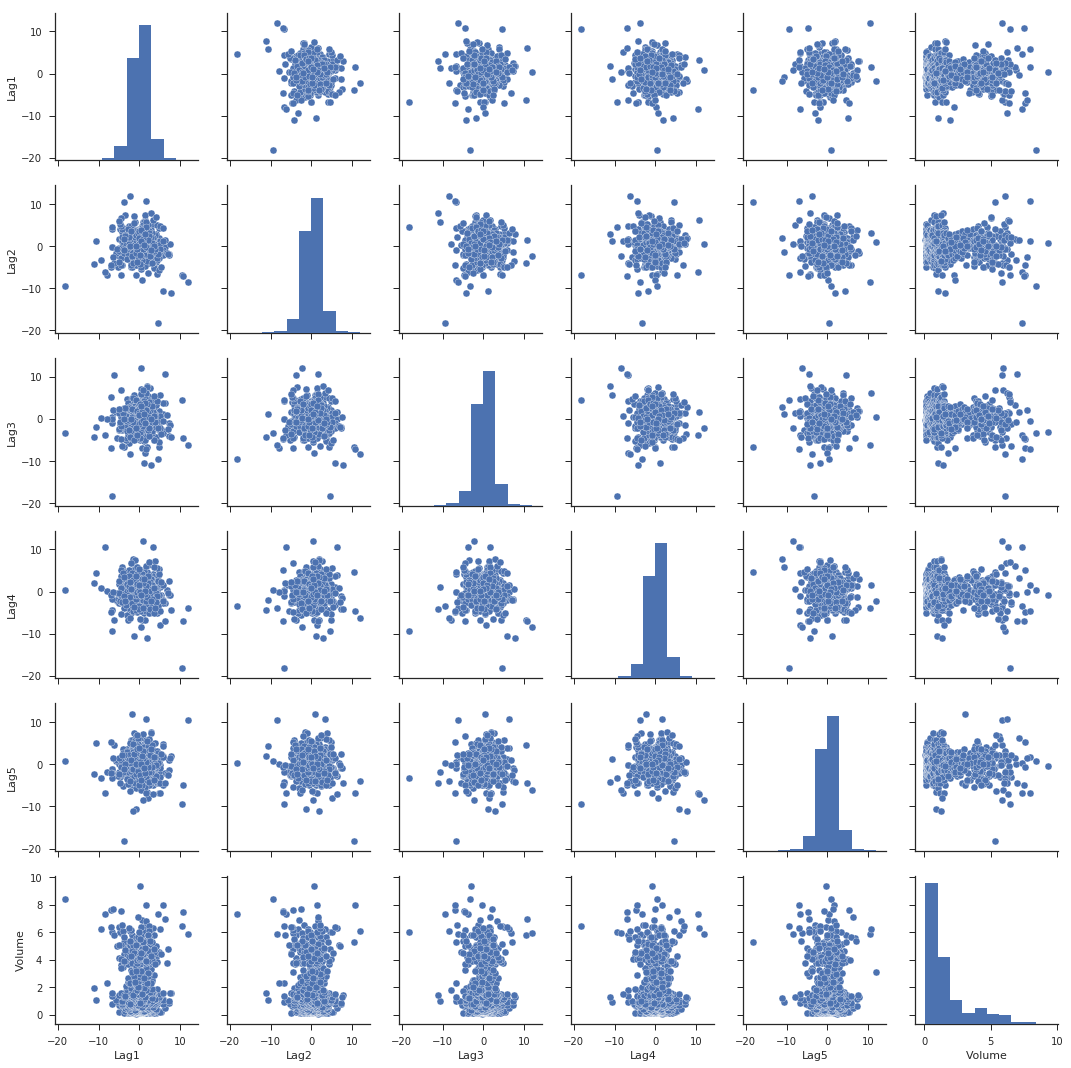

In [3]:
# Use Seaborn to plot scatter matrix of lags, volume, and today

#_ = scatter_matrix(weekly.iloc[:,1:7])
sns.set(style="ticks")
_ = sns.pairplot(weekly.iloc[:,1:7])
#plt.title('Scatter of Feature Correlation', fontsize='15')
#plt.title('(Year and Direction not shown)')
plt.show()

## Part B
Use the full data set to perform a logistic regression with <b>Direction</b> as the response and the five lag variables plus <b>Volume</b> as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [4]:
# Returns zeros
#weekly.isnull().sum()

In [5]:
# First we need to convert the directions into zeros and ones.
# We do so with sklearn's label binarizer.
lb = LabelBinarizer()
y = lb.fit_transform(weekly.Direction)

# Then we create our X from the columns as required
X = np.array(weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])

# Shuffle and split the training set
#rand = int.from_bytes(os.urandom(8), byteorder="big") / ((1 << 64) - 1)
rand = np.random.randint(0,100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rand)
y_train = np.reshape(y_train, (y_train.shape[0],))

# Log Regression
clf = LogisticRegression()
_ = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.5494505494505495


## Part C
Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[  6 119]
 [  4 144]]


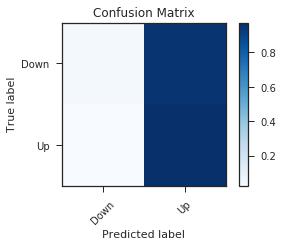

In [6]:
printMatrix()
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

Our classifier generates lots of false positives, and few true positives. The false negative rate is also very low, while the true negative rate is high. This means it is very good at predicting when it is going to be DOWN, but not when it is going to be UP.

## Part D
Now fit the logistic regression model using a training data period from 1990 to 2008, with <b>Lag2</b> as the only predictor. Compute the confusion matrix and the overall fraction of correct prediction for the held out data (that is, the data from 2009 to 2010).

In [7]:
# We create our data set from the columns as required
X_train = weekly[weekly['Year'] < 2009]
X_train = X_train['Lag2']

y_train = weekly[weekly['Year'] < 2009]
y_train = y_train['Direction']

X_test = weekly[weekly['Year'] > 2008]
X_test = X_test['Lag2']

y_test = weekly[weekly['Year'] > 2008]
y_test = y_test['Direction']

# Convert labels again
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_train = np.reshape(y_train, (y_train.shape[0]))
y_test = np.reshape(y_test, (y_test.shape[0]))

# Reshape
X_train = X_train.values.reshape((X_train.shape[0], 1))
X_test = X_test.values.reshape((X_test.shape[0], 1))

# Log Regression
clf = LogisticRegression()
_ = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.625


In [8]:
printMatrix()
print("False negatives  |  True negatives\n")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

False negatives  |  True negatives

[[ 9 34]
 [ 5 56]]


The desired computation is: (9 + 56)/(9 + 56 + 5 + 34)
or, Number Correct/Total Number of Predictions

In [9]:
num_correct = (9 + 56)/(9 + 56 + 5 + 34)
print(num_correct)

0.625


This answer agrees with the computed score

## Part E
Repeat (D) using LDA.

In [10]:
# Make LDA, fit it
lda = LinearDiscriminantAnalysis()
_ = lda.fit(X_train, y_train)
pred = lda.predict(X_test)
print(lda.score(X_test, y_test))

0.625


In [11]:
printMatrix()
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[ 9 34]
 [ 5 56]]


The desired computation is: (9 + 56)/(9 + 56 + 5 + 34)
or, Number Correct/Total Number of Predictions

In [12]:
num_correct = (9 + 56)/(9 + 56 + 5 + 34)
print(num_correct)

0.625


This answer agrees with the computed score

## Part F
Repeat (D) using QDA.

In [13]:
# Make QA, fit it
qda = QuadraticDiscriminantAnalysis()
_ = qda.fit(X_train, y_train)
pred = qda.predict(X_test)
print(qda.score(X_test, y_test))

0.5865384615384616


We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[ 0 43]
 [ 0 61]]


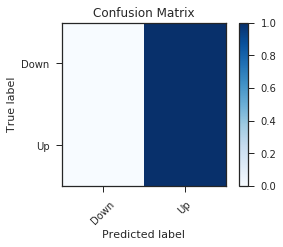

In [14]:
printMatrix()
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

The desired computation is: (61)/(61 + 43)
or, Number Correct/Total Number of Predictions

In [15]:
num_correct = (61)/(61 + 43)
print(num_correct)

0.5865384615384616


This answer agrees with the computed score

## Part G
Repeat (D) using KNN with K = 1.

In [16]:
# Make KNN, fit it
clf = KNeighborsClassifier(n_neighbors=1)
_ = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.49038461538461536


We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[21 22]
 [31 30]]


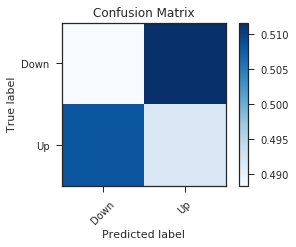

In [17]:
printMatrix()
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

## Part H
Which of these methods appears to provide the best results on this data?

LDA provides the best results by a few percentage points, although none of the methods are spectacular.

## Part I
 Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for K in the KNN classifier.

In [18]:
# Lets make some new data
X_train = weekly[weekly['Year'] < 2009]
X_train = X_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]

y_train = weekly[weekly['Year'] < 2009]
y_train = y_train['Direction']

X_test = weekly[weekly['Year'] > 2008]
X_test = X_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]

y_test = weekly[weekly['Year'] > 2008]
y_test = y_test['Direction']

Trying a few different LDAs...

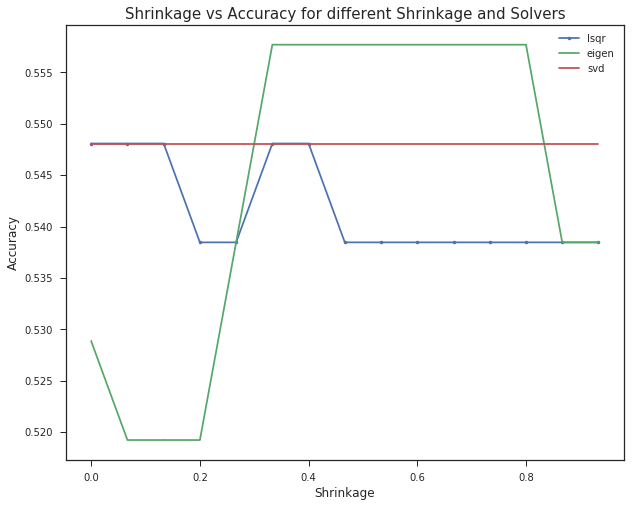

In [19]:
solvers = ['lsqr', 'eigen']
shrinkages = np.linspace(0, 1, 15, endpoint=False)
scores = np.empty((3,15))

for i in range(len(solvers)):
    score = []
    for shrinkage in shrinkages:
        clf = LinearDiscriminantAnalysis(solver=solvers[i], shrinkage=shrinkage)
        _ = clf.fit(X_train, y_train)
        score.append(clf.score(X_test, y_test))
    scores[i, :] = score

clf = LinearDiscriminantAnalysis()
_ = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test) * np.ones((1,15))
scores[2, :] = score

_ = plt.figure(figsize = (10,8))
_ = plt.plot(shrinkages, scores[0,:], marker='.', label = solvers[0])
_ = plt.plot(shrinkages, scores[1,:], marker=',', label = solvers[1])
_ = plt.plot(shrinkages, scores[2,:], label = 'svd')
_ = plt.xlabel("Shrinkage", fontsize=12)
_ = plt.ylabel("Accuracy", fontsize=12)
_ = plt.title("Shrinkage vs Accuracy for different Shrinkage and Solvers", fontsize=15)
_ = plt.legend()

These are all pretty bad, and are worse than when we just used Lag 2. Going to check out the correlation between columns and Direction, then move on to KNN for now.

In [20]:
lb = LabelBinarizer()
y = lb.fit_transform(weekly.Direction)
weekly_copy = weekly.copy()
y = pd.DataFrame(y, columns=['DirectionBinary'])
weekly_copy = pd.concat([weekly_copy, y], axis = 1)
corr_matrix = weekly_copy.corr()
print(corr_matrix['DirectionBinary'].sort_values(ascending=False))
#print(corr_matrix)

DirectionBinary    1.000000
Today              0.720025
Lag2               0.072696
Volume            -0.017995
Lag5              -0.018168
Lag4              -0.020549
Year              -0.022200
Lag3              -0.022913
Lag1              -0.050004
Name: DirectionBinary, dtype: float64


Based on our new information of the correlation, lets choose to run an eigen LDA with shrinkage = 0.6 (based on previous results), using the columns Lag1, Lag2, and Today.

In [21]:
# Lets make some new data
X_train = weekly_copy[weekly_copy['Year'] < 2009]
X_train = X_train[['Lag1', 'Lag2', 'Today']]

y_train = weekly_copy[weekly_copy['Year'] < 2009]
y_train = y_train['DirectionBinary']

X_test = weekly_copy[weekly_copy['Year'] > 2008]
X_test = X_test[['Lag1', 'Lag2', 'Today']]

y_test = weekly_copy[weekly_copy['Year'] > 2008]
y_test = y_test['DirectionBinary']

In [22]:
clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.6)
_ = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [23]:
print(score)

0.9903846153846154


Now the question is whether using the 'Today' column is "cheating"? We re-ran the same model without the 'Today' column below.

In [24]:
X_train = X_train[['Lag1', 'Lag2']]
X_test = X_test[['Lag1', 'Lag2']]
clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.6)
_ = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.5769230769230769


For now, we will simply display both models and not answer whether we should use 'Today' or not. Below, we try to stack on a column for $(Lag1)^2$ and re-run LDA.

In [25]:
X_train = X_train[['Lag1', 'Lag2']]
X_train['Lag1Sqrd'] = X_train['Lag1']**2
X_test = X_test[['Lag1', 'Lag2']]
X_test['Lag1Sqrd'] = X_test['Lag1']**2
clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage=0.6)
_ = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.4519230769230769


Much worse, lets move on to some KNN. Since Lag2 had the highest correlation (besides Today), we will use that.

In [26]:
# Reset our data
X_train = weekly[weekly['Year'] < 2009]
X_train = X_train['Lag2']

X_test = weekly[weekly['Year'] > 2008]
X_test = X_test['Lag2']

# Reshape
X_train = X_train.values.reshape((X_train.shape[0], 1))
X_test = X_test.values.reshape((X_test.shape[0], 1))

# Make KNN, fit it
k_vals = np.arange(1,30,1)
scores = []
for k in k_vals:
    clf = KNeighborsClassifier(n_neighbors=k)
    _ = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    #print(clf.score(X_test, y_test))

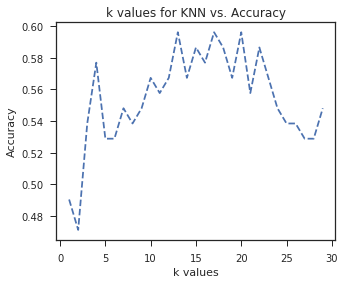

In [27]:
knnPlot(k_vals, scores)

Maybe adding Lag1 back in will help?

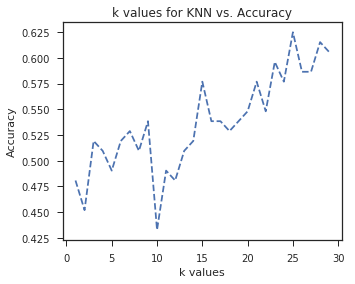

In [28]:
# Reset our data
X_train = weekly[weekly['Year'] < 2009]
X_train = X_train[['Lag1', 'Lag2']]

X_test = weekly[weekly['Year'] > 2008]
X_test = X_test[['Lag1','Lag2']]

# Make KNN, fit it
k_vals = np.arange(1,30,1)
scores = []
for k in k_vals:
    clf = KNeighborsClassifier(n_neighbors=k)
    _ = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    #print(clf.score(X_test, y_test))

knnPlot(k_vals, scores)

Add more k values then? Maybe another column?

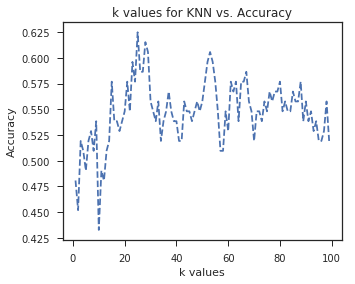

In [29]:
# Make KNN, fit it
k_vals = np.arange(1,100,1)
scores = []
for k in k_vals:
    clf = KNeighborsClassifier(n_neighbors=k)
    _ = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    #print(clf.score(X_test, y_test))
    
knnPlot(k_vals, scores)

Maybe another column?

In [30]:
# Reset our data
X_train = weekly[weekly['Year'] < 2009]
X_train = X_train[['Lag1', 'Lag2', 'Lag3']]
X_train['Lag2Sqrd'] = X_train['Lag2']**2

X_test = weekly[weekly['Year'] > 2008]
X_test = X_test[['Lag1','Lag2', 'Lag3']]
X_test['Lag2Sqrd'] = X_test['Lag2']**2

# Make KNN, fit it
k_vals = np.arange(1, 40, 1)
scores = []
for k in k_vals:
    clf = KNeighborsClassifier(n_neighbors=k)
    _ = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    #print(clf.score(X_test, y_test))
    
knnPlot(k_vals, scores)

Trying some different distance metrics on the same data.

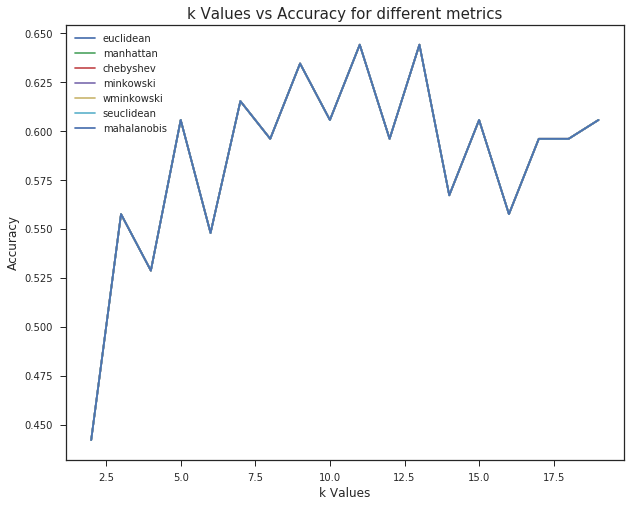

In [31]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis']
k_vals = np.arange(2, 20, 1)
scores = np.empty((len(metrics),len(k_vals)))

for i in range(len(metrics)):
    score = []
    for k in k_vals:
        clf = KNeighborsClassifier(n_neighbors=k)
        _ = clf.fit(X_train, y_train)
        score.append(clf.score(X_test, y_test))
    scores[i, :] = score

_ = plt.figure(figsize = (10,8))
for i in range(len(metrics)):
    _ = plt.plot(k_vals, scores[i,:], label = metrics[i])

_ = plt.xlabel("k Values", fontsize=12)
_ = plt.ylabel("Accuracy", fontsize=12)
_ = plt.title("k Values vs Accuracy for different metrics", fontsize=15)
_ = plt.legend()

Not particularly enlightening. We will settle for KNN with $k = 10$ as the best of the bunch for now.

# Problem 3
## (Problem 5, Chapter 5, page 198)
In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.

In [1]:
#libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

In [2]:
#os.getcwd()
## loading the dataset
filePath = '../../datasets/ISLR/data/csv/'
fileName = 'Default.csv'
default = pd.read_csv(filePath+fileName)
#default.head()

## Part A

Fit a logistic regression model that uses income and balance to
predict default.

In [3]:
# Splitting data into training and testing
clf = LogisticRegression()
X_train = default[['income','balance']]
y_train = default['default']
_= clf.fit(X_train, y_train)
pred_a = clf.predict(X_train)

In [4]:
# Calculating training error
size_a = pred_a.size
count_a = 0
for i in range(size_a):
    if(pred_a[i] != y_train.iloc[i]):
        count_a += 1
train_error = count_a / size_a
print("Training error of the dataset is {}".format(train_error))

Training error of the dataset is 0.0336


## Part B

Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.

ii. Fit a multiple logistic regression model using only the training observations.

iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of
default for that individual, and classifying the individual to the default category if the posterior probability is greater
than 0.5.

iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [5]:
# Splitting data into test and train
train, test = train_test_split(default, test_size=0.2)
X_train_b = train[['income','balance']]
y_train_b = train['default']
X_test_b = test[['income','balance']]
y_test_b = test['default']

In [6]:
# Fitting the logistic regression model and saving only concerned probabilities
clf_b = LogisticRegression()
_ = clf_b.fit(X_train_b,y_train_b)
pred_b = clf_b.predict(X_test_b)

In [7]:
# Calculating the number of values that don't match across validation set and predictions
size_b = pred_b.size
count_b = 0
for i in range(size_b):
    if(pred_b[i]!=y_test_b.iloc[i]):
        count_b +=1
        
# Calculating validation error
validation_error_b = count_b/y_test_b.size
print("test error with validation set ratio 0.2 is {}".format(validation_error_b))

test error with validation set ratio 0.2 is 0.04


## Part C
Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained.

In [8]:
# Repeating part b with validation set of ratio 0.3
train_c_1,test_c_1 = train_test_split(default, test_size=0.3)
X_train_c_1 = train_c_1[['income','balance']]
y_train_c_1 = train_c_1['default']
X_test_c_1 = test_c_1[['income','balance']]
y_test_c_1 = test_c_1['default']

# Fitting the logistic regression model and saving only concerned probabilities
clf_c_1 = LogisticRegression()
_ = clf_c_1.fit(X_train_c_1,y_train_c_1)
pred_c_1 = clf_c_1.predict(X_test_c_1)

# Calculating the number of values that don't match across validation set and predictions
size_c_1 = pred_c_1.size
count_c_1 = 0
for i in range(size_c_1):
    if(pred_c_1[i]!=y_test_c_1.iloc[i]):
        count_c_1 +=1
        
# Calculating validation error
validation_error_c_1 = count_c_1/y_test_c_1.size
print("Test error with validation set ratio 0.3 is {}".format(validation_error_c_1))

Test error with validation set ratio 0.3 is 0.028666666666666667


In [9]:
# Repeating part b with validation set of ratio 0.4
train_c_2,test_c_2 = train_test_split(default, test_size=0.4)
X_train_c_2 = train_c_2[['income','balance']]
y_train_c_2 = train_c_2['default']
X_test_c_2 = test_c_2[['income','balance']]
y_test_c_2 = test_c_2['default']


# Fitting the logistic regression model and saving only concerned probabilities
clf_c_2 = LogisticRegression()
_ = clf_c_2.fit(X_train_c_2,y_train_c_2)
pred_c_2 = clf_c_2.predict(X_test_c_2)

# Calculating the number of values that don't match across validation set and predictions
size_c_2 = pred_c_2.size
count_c_2 = 0
for i in range(size_c_2):
    if(pred_c_2[i]!=y_test_c_2.iloc[i]):
        count_c_2 +=1
        
# Calculating validation error
validation_error_c_2 = count_c_2/y_test_c_2.size
print("Test error with validation set ratio 0.4 is {}".format(validation_error_c_2))

Test error with validation set ratio 0.4 is 0.033


In [10]:
# Repeating part b with validation set of ratio 0.5
train_c_3,test_c_3 = train_test_split(default, test_size=0.5)
X_train_c_3 = train_c_3[['income','balance']]
y_train_c_3 = train_c_3['default']
X_test_c_3 = test_c_3[['income','balance']]
y_test_c_3 = test_c_3['default']


# Fitting the logistic regression model and saving only concerned probabilities
clf_c_3 = LogisticRegression()
_ = clf_c_3.fit(X_train_c_3,y_train_c_3)
pred_c_3 = clf_c_3.predict(X_test_c_3)

# Calculating the number of values that don't match across validation set and predictions
size_c_3 = pred_c_3.size
count_c_3 = 0
for i in range(size_c_3):
    if(pred_c_3[i]!=y_test_c_3.iloc[i]):
        count_c_3 +=1
        
# Calculating validation error
validation_error_c_3 = count_c_3/y_test_c_3.size
print("Test error with validation set ratio 0.5 is {}".format(validation_error_c_3))

Test error with validation set ratio 0.5 is 0.0358


Test error increases with increase in size of validation set as expected except for the case of validation set ratio 0.5

## Part D

Now consider a logistic regression model that predicts the prob-
ability of default using income , balance , and a dummy variable
for student . Estimate the test error for this model using the val-
idation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

In [11]:
# Converting student to float because regression model doesn't accept strings
default_copy = default.copy()
lb = LabelBinarizer()
y = lb.fit_transform(default.student)
default_copy['student'] = y

In [12]:
# Considering a logistic regression model with student as a predictor 
train_d,test_d = train_test_split(default_copy, test_size=0.4)

X_train_d = train_d[['student','income','balance']]
y_train_d = train_d['default']
X_test_d = test_d[['student','income','balance']]
y_test_d = test_d['default']


# Fitting the logistic regression model and saving only concerned probabilities
clf_d = LogisticRegression()
_ = clf_d.fit(X_train_d,y_train_d)
pred_d = clf_d.predict(X_test_d)

# Calculating the number of values that don't match across validation set and predictions
size_d = pred_d.size
count_d = 0
for i in range(size_d):
    if(pred_d[i]!=y_test_d.iloc[i]):
        count_d +=1
        
# Calculating validation error
validation_error_d = count_d/y_test_d.size
print("Test error with validation set ratio 0.4 is {}".format(validation_error_d))

Test error with validation set ratio 0.4 is 0.03775


Considering student status increases test error of the logistic regression model slightly as we observed change from .03425 to .03475 with same size validation set.

# Problem 4
## Problem 8 from Chapter 5

We will now perform cross-validation on a simulated data set.

In [27]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm

## Part A
Generate a simulated data set as follows:
```
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)
```
In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.

In [28]:
random.seed(1)
x = np.random.randn(100)
y = (x-(2*(x*x)) + np.random.randn(100))
B0 = np.ones(100)

N is number of samples and in this case it is 100. P is number of predictors and equal to 1 in this case

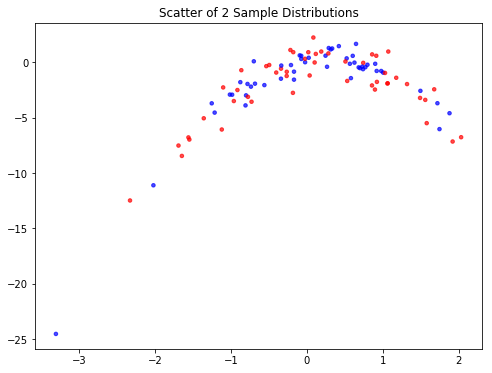

In [29]:
## creating a scatter plto
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
_ = ax.scatter(x, y, alpha=0.7, s=50, color = ['red','blue'], marker= '.')
_ = plt.title('Scatter of 2 Sample Distributions', FontSize=12)
#_ = plt.legend(loc=, prop={'size' : 12})
_ = plt.show()

## Part B
Create a scatterplot of X against Y . Comment on what you find.

X and Y are highly correlated. y is simply shift of x with added gaussian noise

## Part C
Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:<br>
$i. Y = \beta_0 + \beta_1 X $<br>
$ii. Y = \beta_0 + \beta_1 X + \beta_2 X^2$<br>
$iii. Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3$<br>
$iv. Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4$<br>
Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .

In [30]:
# Getting leave one out and linear regression model
loo = LeaveOneOut()
clf = LinearRegression()

# Creating copies of the original data for local use
x_copy =x
y_copy =y

# Creating arrays with power 2,3,4 of x to use in models 2,3,4
x_2 = np.power(x_copy, 2)
x_3 = np.power(x_copy, 3)
x_4 = np.power(x_copy, 4)

### Part i.

In [31]:
# Benerating a data frame from generated data
# creating dictionary to generate data frame
# B0 is simply a column of ones
dict_data = {'B0':B0,
        'x':x_copy,     
       'y':y_copy}
dataset_1 = pd.DataFrame(dict_data)

In [32]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_1 = []
def calc_mse_1(train_index, test_index):
    train = dataset_1.loc[train_index]
    test = dataset_1.loc[test_index]
    X_train = train[['B0','x']]#.values.reshape(-1,1)
    y_train = train['y']
    X_test = test[['B0','x']]#.values.reshape(-1,1)
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_1.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_1):
    calc_mse_1(train_index, test_index)

scores_1 = np.asarray(scores_1)
mean_1 = np.mean(scores_1)

print("Mean of the scores with 1 degrees of freedom is {}".format(mean_1))

Mean of the scores with 1 degrees of freedom is 11.14681456827608


In [33]:
## split dataset into y and X and compute statistical significance of the coefs using statsmodel

X_1 = dataset_1[['B0','x']]
y_1 = dataset_1['y']


model_1 = sm.OLS(y_1, X_1)
results_1 = model_1.fit()
print(results_1.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     25.29
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           2.23e-06
Time:                        14:02:12   Log-Likelihood:                -255.99
No. Observations:                 100   AIC:                             516.0
Df Residuals:                      98   BIC:                             521.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B0            -2.0823      0.317     -6.566      0.0

### Part ii.

In [34]:
# Creating dictionary to generate data frame
# B0 is simply a column of ones
dict_data = {'B0':B0,
             'x':x_copy,
            'x^2':x_2,
             'y':y_copy}
dataset_2 = pd.DataFrame(dict_data)

In [35]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_2 = []
def calc_mse_2(train_index, test_index):
    train = dataset_2.loc[train_index]
    test = dataset_2.loc[test_index]
    X_train = train[['B0','x','x^2']]
    y_train = train['y']
    X_test = test[['B0','x','x^2']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_2.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_2):
    calc_mse_2(train_index, test_index)

scores_2 = np.asarray(scores_2)
mean_2 = np.mean(scores_2)

print("Mean of the scores with 2 degrees of freedom is {}".format(mean_2))

Mean of the scores with 2 degrees of freedom is 1.0678843695488707


In [36]:
## split dataset into y and X and compute statistical significance of the coefs using statsmodel
X_2 = dataset_2[['B0','x','x^2']]
y_2 = dataset_2['y']


model_2 = sm.OLS(y_2, X_2)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     564.8
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           3.60e-54
Time:                        14:02:13   Log-Likelihood:                -140.61
No. Observations:                 100   AIC:                             287.2
Df Residuals:                      97   BIC:                             295.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B0             0.0424      0.123      0.344      0.7

### Part iii.

In [37]:
# Creating dictionary to generate data fram
# B0 is simply a column of ones
dict_data = {'B0':B0,
             'x':x_copy,
             'x^2':x_2,
             'x^3':x_3,
             'y':y_copy}
dataset_3 = pd.DataFrame(dict_data)

In [38]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_3 = []
def calc_mse_3(train_index, test_index):
    train = dataset_3.loc[train_index]
    test = dataset_3.loc[test_index]
    X_train = train[['B0','x','x^2','x^3']]
    y_train = train['y']
    X_test = test[['B0','x','x^2','x^3']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_3.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_3):
    calc_mse_3(train_index, test_index)

scores_3 = np.asarray(scores_3)
mean_3 = np.mean(scores_3)

print("Mean of the scores with 3 degrees of freedom is {}".format(mean_3))

Mean of the scores with 3 degrees of freedom is 0.9965573529301355


In [39]:
## split dataset into y and X and compute statistical significance of the coefs using statsmodel
X_3 = dataset_3[['B0','x','x^2','x^3']]
y_3 = dataset_3['y']


model_3 = sm.OLS(y_3, X_3)
results_3 = model_3.fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     392.9
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           9.35e-54
Time:                        14:02:13   Log-Likelihood:                -138.17
No. Observations:                 100   AIC:                             284.3
Df Residuals:                      96   BIC:                             294.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B0             0.1219      0.126      0.964      0.3

### Part iv.

In [40]:
# Creating dictionary to generate data fram
dict_data = {'B0':B0,
             'x':x_copy,
             'x^2':x_2,
             'x^3':x_3,
             'x^4':x_4,
             'y':y_copy}
dataset_4 = pd.DataFrame(dict_data)

In [41]:
## this function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_4 = []
def calc_mse_4(train_index, test_index):
    train = dataset_4.loc[train_index]
    test = dataset_4.loc[test_index]
    X_train = train[['B0','x','x^2','x^3','x^4']]
    y_train = train['y']
    X_test = test[['B0','x','x^2','x^3','x^4']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_4.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_4):
    calc_mse_4(train_index, test_index)

scores_4 = np.asarray(scores_4)
mean_4 = np.mean(scores_4)

print("Mean of the scores with 4 degrees of freedom is {}".format(mean_4))

Mean of the scores with 4 degrees of freedom is 1.1941575019349997


In [42]:
## split dataset into y and X and compute statistical significance of the coefs using statsmodel
X_4 = dataset_4[['B0','x','x^2','x^3','x^4']]
y_4 = dataset_4['y']


model_4 = sm.OLS(y_4, X_4)
results_4 = model_4.fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     291.7
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           2.00e-52
Time:                        14:02:13   Log-Likelihood:                -138.16
No. Observations:                 100   AIC:                             286.3
Df Residuals:                      95   BIC:                             299.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
B0             0.1321      0.143      0.922      0.3

## Part D
Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

In [43]:
# Generating a new distribution with a random seed
# _n after a variable name refers to coming from this new distribution

random.seed(np.random.randint(10,100))
x_n = np.random.randn(100)
y_n = (x_n-(2*(x_n*x_n)) + np.random.randn(100))

In [44]:
# Creating copies of the original data for local use
x_copy_n = x_n
y_copy_n = y_n

# Creating arrays with power 2,3,4 of x to use in models 2,3,4
x_2_n = np.power(x_copy_n, 2)
x_3_n = np.power(x_copy_n, 3)
x_4_n = np.power(x_copy_n, 4)

# using same loo and linearregression model obtained in part c

### Part i.

In [45]:
# Generating a data frame from generated data
# creating dictionary to generate data frame
dict_data = {'B0':B0,
             'x':x_copy_n,
            'y':y_copy_n}
dataset_1_n = pd.DataFrame(dict_data)

In [46]:
## This function takes in test and train indexes,splits data into train and test,
## and calculates mean squared error and appends it to score
scores_1_n = []
def calc_mse_1_n(train_index, test_index):
    train = dataset_1_n.loc[train_index]
    test = dataset_1_n.loc[test_index]
    X_train = train[['B0','x']]
    y_train = train['y']
    X_test = test[['B0','x']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_1_n.append(error)
    
## splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_1_n):
    calc_mse_1_n(train_index, test_index)

scores_1_n = np.asarray(scores_1_n)
mean_1_n = np.mean(scores_1_n)

print("Mean of the scores with 1 degrees of freedom is {}".format(mean_1_n))

Mean of the scores with 1 degrees of freedom is 16.41644155680011


### Part ii.

In [47]:
# Creating dictionary to generate data frame
dict_data = {'B0':B0,
             'x':x_copy_n,
             'x^2':x_2_n,
             'y':y_copy_n}
dataset_2_n = pd.DataFrame(dict_data)

In [48]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_2_n = []
def calc_mse_2_n(train_index, test_index):
    train = dataset_2_n.loc[train_index]
    test = dataset_2_n.loc[test_index]
    X_train = train[['B0','x','x^2']]
    y_train = train['y']
    X_test = test[['B0','x','x^2']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_2_n.append(error)
    
## Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_2_n):
    calc_mse_2_n(train_index, test_index)

scores_2_n = np.asarray(scores_2_n)
mean_2_n = np.mean(scores_2_n)

print("Mean of the scores with 2 degrees of freedom is {}".format(mean_2_n))

Mean of the scores with 2 degrees of freedom is 0.7726639051864902


### Part iii.

In [49]:
# Creating dictionary to generate data fram
dict_data = {'B0':B0,
             'x':x_copy_n,
             'x^2':x_2_n,
             'x^3':x_3_n,
             'y':y_copy_n}
dataset_3_n = pd.DataFrame(dict_data)

In [50]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_3_n = []
def calc_mse_3_n(train_index, test_index):
    train = dataset_3_n.loc[train_index]
    test = dataset_3_n.loc[test_index]
    X_train = train[['B0','x','x^2','x^3']]
    y_train = train['y']
    X_test = test[['B0','x','x^2','x^3']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_3_n.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_3_n):
    calc_mse_3_n(train_index, test_index)

scores_3_n = np.asarray(scores_3_n)
mean_3_n = np.mean(scores_3_n)

print("Mean of the scores with 3 degrees of freedom is {}".format(mean_3_n))

Mean of the scores with 3 degrees of freedom is 0.7596657376816897


### Part iv.

In [51]:
# Creating dictionary to generate data fram
dict_data = {'B0':B0,
             'x':x_copy_n,
             'x^2':x_2_n,
             'x^3':x_3_n,
             'x^4':x_4_n,
             'y':y_copy_n}
dataset_4_n = pd.DataFrame(dict_data)

In [52]:
# This function takes in test and train indexes,splits data into train and test,
# and calculates mean squared error and appends it to score
scores_4_n = []
def calc_mse_4_n(train_index, test_index):
    train = dataset_4_n.loc[train_index]
    test = dataset_4_n.loc[test_index]
    X_train = train[['B0','x','x^2','x^3','x^4']]
    y_train = train['y']
    X_test = test[['B0','x','x^2','x^3','x^4']]
    y_test = test['y']
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    error = mse(pred,y_test)
    scores_4_n.append(error)
    
# Splits data set into train and test leaving one out and repeats n times
for train_index, test_index in loo.split(dataset_4_n):
    calc_mse_4_n(train_index, test_index)

scores_4_n = np.asarray(scores_4_n)
mean_4_n = np.mean(scores_4_n)

print("Mean of the scores with 4 degrees of freedom is {}".format(mean_4_n))

Mean of the scores with 4 degrees of freedom is 0.7839156641370338


## Part E
Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.

The 2nd model has the smallest mean squared error. This is expected because our data can be modelled best in 2 variables as we can see from the scatter plot. 3 and 4 degrees of freedom result in overfitting which increases our mean error a little.

## Part F
Comment on the statistical significance of the coefficient estimates
that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

Since our data can be best fit in two variables, we can see it from the scatter plot. We find that coefficients B1 and B2 are the most statistically significant. Also, we can see from our results that B3 and B4 might overfit the data.